In [22]:
                                                                                                                                                                                                                                                                                                                                                                        import numpy as np 
import matplotlib as mp
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import math
import tensorflow.contrib.slim as slim
from sklearn.linear_model import LogisticRegression

In [23]:
def randomn_selection(X_train,label_train,k):
    idx = np.random.randint(X_train.shape[0], size=k)
    return X_train[idx],label_train[idx]

In [24]:
# Building the encoder
def encoder(x,weights,biases):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x,weights,biases):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [25]:
def trainEncoder(learning_rate,num_steps,batch_size,num_hidden_1,num_hidden_2,num_input,X_train,label_train):

    # tf Graph input (only pictures)
    X = tf.placeholder("float", [None, num_input])

    weights = {
        'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
        'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
        'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
        'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    }
    biases = {
        'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
        'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
        'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
        'decoder_b2': tf.Variable(tf.random_normal([num_input])),
    }
    
    # Construct model
    encoder_op = encoder(X,weights,biases)
    autoencoder = decoder(encoder_op,weights,biases)

    # Prediction
    y_pred = autoencoder
    # Targets (Labels) are the input data.
    y_true = X

    # Define loss and optimizer, minimize the squared error
    loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    # Start Training
    # Start a new TF session
    sess = tf.Session()

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = randomn_selection(X_train,label_train,batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))
            
    return X,weights,biases,sess

In [26]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256
display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

In [6]:
nist = fetch_mldata('MNIST original')
mnist = nist.data
mnistnew = mnist/255;
mnistlabel = nist.target

X_train, X_test, label_train, label_test = train_test_split(mnistnew,mnistlabel , test_size=0.10, random_state=42)
X,weights,biases,sess = trainEncoder(learning_rate,num_steps,batch_size,num_hidden_1,num_hidden_2,num_input,X_train,label_train)

Step 1: Minibatch Loss: 0.447741
Step 1000: Minibatch Loss: 0.138039
Step 2000: Minibatch Loss: 0.118210
Step 3000: Minibatch Loss: 0.107286
Step 4000: Minibatch Loss: 0.106169
Step 5000: Minibatch Loss: 0.100897
Step 6000: Minibatch Loss: 0.093960
Step 7000: Minibatch Loss: 0.094607
Step 8000: Minibatch Loss: 0.089334
Step 9000: Minibatch Loss: 0.086508
Step 10000: Minibatch Loss: 0.085746
Step 11000: Minibatch Loss: 0.084993
Step 12000: Minibatch Loss: 0.083677
Step 13000: Minibatch Loss: 0.080964
Step 14000: Minibatch Loss: 0.081390
Step 15000: Minibatch Loss: 0.077814
Step 16000: Minibatch Loss: 0.075230
Step 17000: Minibatch Loss: 0.074349
Step 18000: Minibatch Loss: 0.073821
Step 19000: Minibatch Loss: 0.071612
Step 20000: Minibatch Loss: 0.071289
Step 21000: Minibatch Loss: 0.069567
Step 22000: Minibatch Loss: 0.073628
Step 23000: Minibatch Loss: 0.071181
Step 24000: Minibatch Loss: 0.067392
Step 25000: Minibatch Loss: 0.065136
Step 26000: Minibatch Loss: 0.064396
Step 27000: Mi

Original Images


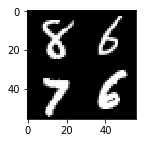

Reconstructed Images


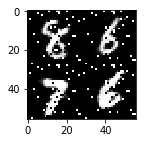

In [7]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 2
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

encoder = encoder(X,weights,biases)
autoencoder = decoder(encoder,weights,biases)

for i in range(n):
    # MNIST test set
    batch_x, _ = randomn_selection(X_test,label_test,batch_size)
    # Encode and decode the digit image
    g = sess.run(autoencoder, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [8]:
gtest = sess.run(encoder, feed_dict={X: X_test})
gtrain = sess.run(encoder, feed_dict={X: X_train})
print(gtest.shape)
print(gtrain.shape)

(7000, 128)
(63000, 128)


In [12]:
LR = LogisticRegression()
LResult = LR.fit(gtrain,label_train)
print(LResult.score(gtest,label_test))

0.8794285714285714


In [38]:
label_train[0]

7.0

In [43]:
from sklearn.metrics.pairwise import euclidean_distances
distmatrix = euclidean_distances(gtest)
indexes = np.sort(np.argpartition(distmatrix,20,axis=1)[:,:20],axis=1)
indexes.shape

distmatrix = euclidean_distances(X_test)
indexestrain = np.sort(np.argpartition(distmatrix,20,axis=1)[:,:20],axis=1)
indexestrain.shape
idx = np.random.randint(indexestrain.shape[0], size=50)
selectedtest = indexestrain[idx]
selecttensor = indexes[idx]
for i in range(50):
    print("IMAGE: " + str(i))
    resultold = ""
    for a in selectedtest[i]:
        resultold += " " + str(label_test[a])
    resultnew = ""
    for b in selecttensor[i]:
        resultnew += " " + str(label_test[b])
    print("OLD: " + resultold)
    print("Encoded: " + resultnew)
    print("\n")

IMAGE: 0
OLD:  6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0
Encoded:  6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0


IMAGE: 1
OLD:  5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 8.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0
Encoded:  5.0 5.0 5.0 8.0 5.0 5.0 5.0 5.0 8.0 3.0 0.0 5.0 5.0 0.0 5.0 5.0 5.0 5.0 5.0 3.0


IMAGE: 2
OLD:  0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0
Encoded:  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


IMAGE: 3
OLD:  4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0
Encoded:  4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0


IMAGE: 4
OLD:  7.0 7.0 9.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 9.0
Encoded:  7.0 9.0 7.0 9.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 7.0 9.0 7.0 7.0 7.0


IMAGE: 5
OLD:  2.0 6.0 2.0 2.0 2.0 2.0 2.0 2.0 8.0 2.0 2.0 2.0 2.